# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Updating directory to find the data set and keep all information in 1 place
%cd /content/drive/MyDrive/MITDataScience/Food\ Hub\ Project

/content/drive/MyDrive/MITDataScience/Food Hub Project


In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
df.shape  # Shows that there are 1898 rows and 9 columns

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Shows the different datatypes for the different columns:**


1. order_id: int64
2. customer_id: int64
3. restaurant_name: object
4. cuisine_type: object
5. cost_of_the_order: float64
6. day_of_the_week: object
7. rating: object
8. food_preparation_time: int64
9. delivery_time: int64

#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here

df.isnull().values.any()  # Checking to see if there are any missing values, since the value is False --> There are no missing values.

False

**The output was False indicating there are no missing values in the dataset**

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df.describe()  # Checking the statistical summary

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


**The minimum, average, and maximum time it takes to prepare the food:**


* minimum = 20.00	mins
* average = 27.37 mins
* maximum = 35.00 mins

#### Observations:


### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
df.rating.value_counts()  # Showing the orders rated

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

**The above information is showing that 736 orders were not rated.**

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

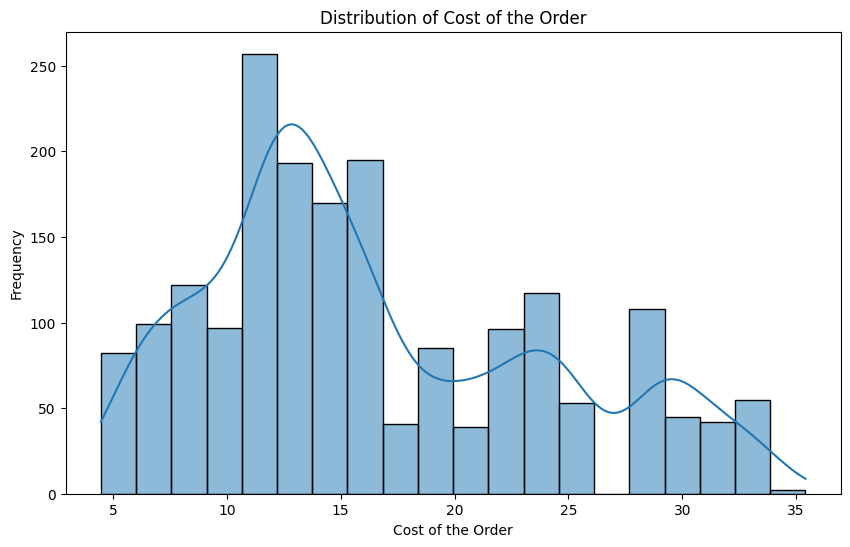

In [ ]:
# Write the code here
# Histogram for cost of the order
plt.figure(figsize=(10, 6))
sns.histplot(df['cost_of_the_order'], bins=20, kde=True)
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()

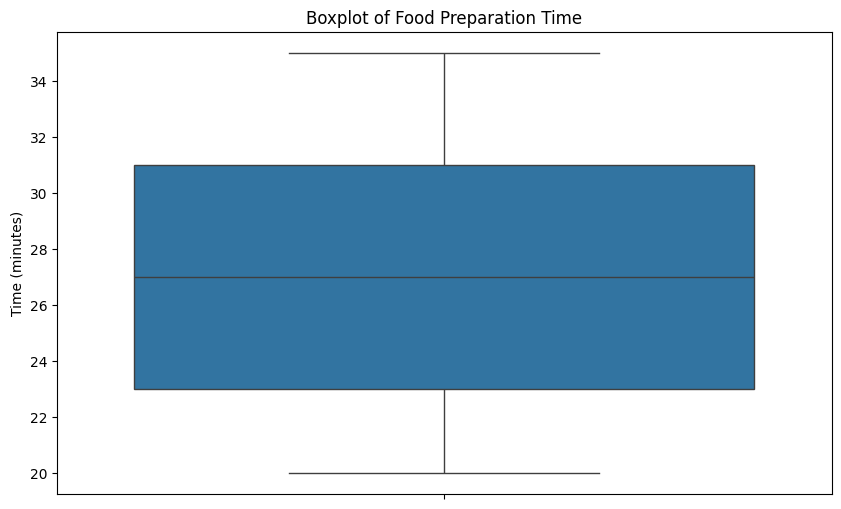

In [ ]:
# Boxplot for food preparation time
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['food_preparation_time'])
plt.title('Boxplot of Food Preparation Time')
plt.ylabel('Time (minutes)')
plt.show()

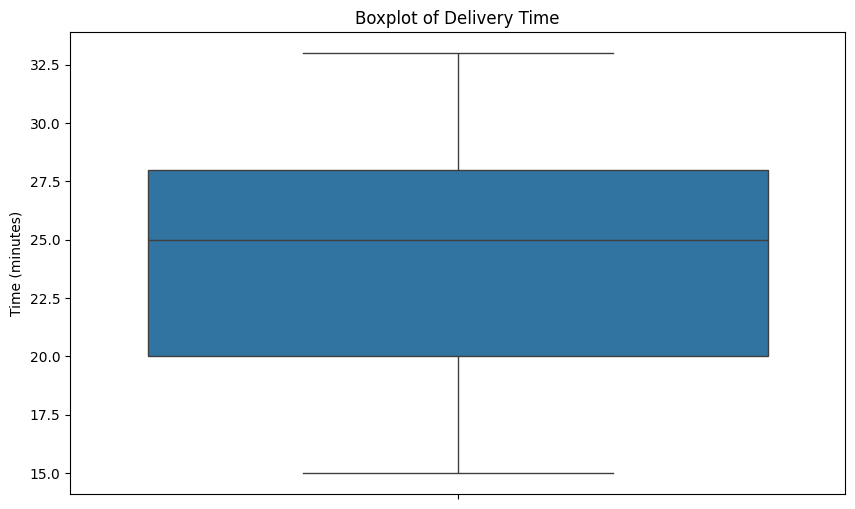

In [ ]:
# Boxplot for delivery time
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['delivery_time'])
plt.title('Boxplot of Delivery Time')
plt.ylabel('Time (minutes)')
plt.show()

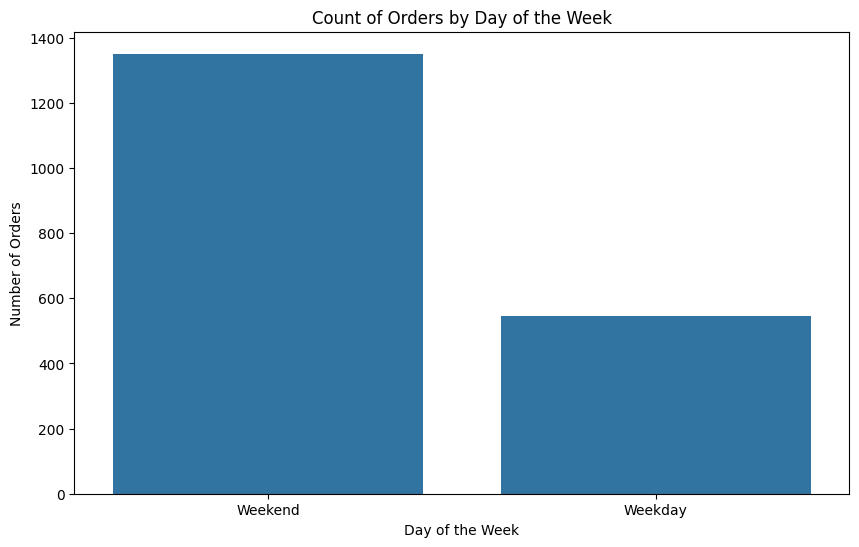

In [ ]:
# Countplot for day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_the_week', data=df, order = df['day_of_the_week'].value_counts().index)
plt.title('Count of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

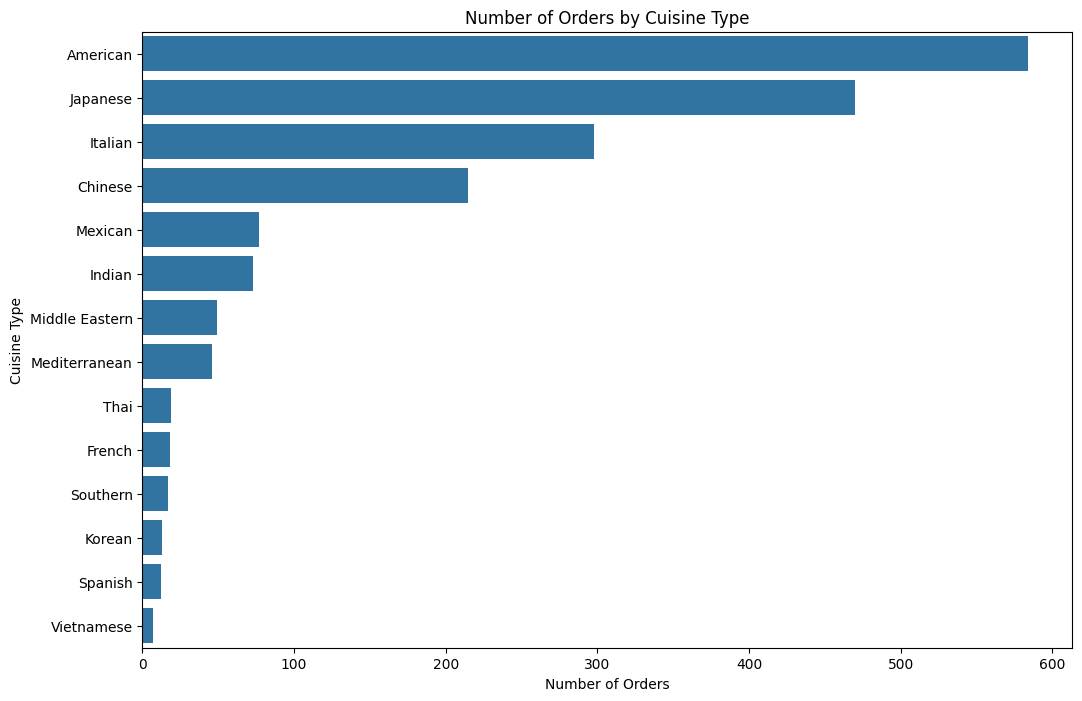

In [ ]:
# Barplot for cuisine type
cuisine_counts = df['cuisine_type'].value_counts().reset_index()
cuisine_counts.columns = ['cuisine_type', 'count']

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='cuisine_type', data=cuisine_counts)
plt.title('Number of Orders by Cuisine Type')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.show()

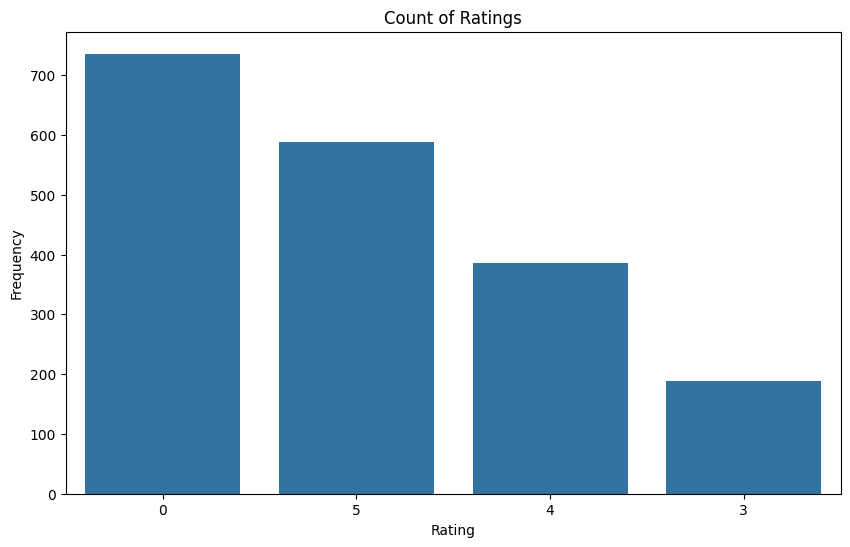

In [ ]:
# Countplot for rating
# Replace 'Not given' with 0 and convert the column to numeric
df['rating'] = df['rating'].replace('Not given', 0)

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, order = df['rating'].value_counts().index)
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
df.restaurant_name.value_counts()  # Checking by the value count

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

**Based on the orders received the top 5 restaurants are:**
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends?

The most popular cuisine on weekends is: American


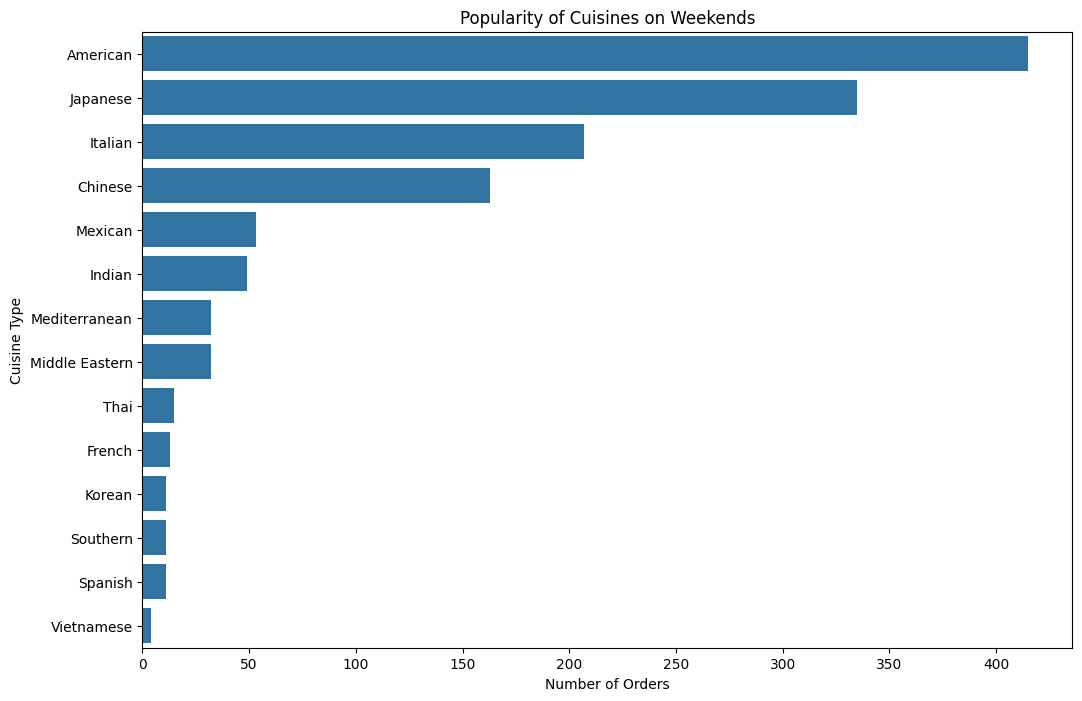

In [ ]:
# Write the code here
# Obtaining the most order cusinie
weekend_orders = df[df['day_of_the_week'].isin(['Weekend'])]
cuisine_count = weekend_orders['cuisine_type'].value_counts()
most_popular_cuisine = cuisine_count.idxmax()
print("The most popular cuisine on weekends is:", most_popular_cuisine)

# Barplot for the cuisines
plt.figure(figsize=(12, 8))
sns.countplot(data=weekend_orders, y='cuisine_type', order=cuisine_count.index)
plt.title('Popularity of Cuisines on Weekends')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.show()

**Based on the information above American is the most popular cuisine on weekends.**

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]
total_orders = df.shape[0]

percentage_above_20 = (orders_above_20 / total_orders) * 100

print("Percentage of orders costing more than 20 dollars:", str(round(percentage_above_20,2)) + "%")

Percentage of orders costing more than 20 dollars: 29.24%


**Based on the information above 29.24% of the orders cost more than 20 dollars.**

#### Observations:


### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()
print("The mean order delivery time:", round(mean_delivery_time, 2), "minutes")

The mean order delivery time: 24.16 minutes


**Based on the information the mean delivery time is 24.16 minutes.**

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
customer_order_counts = df['customer_id'].value_counts()
top_customers = customer_order_counts.head(3)
print("Top 3 most frequent customers:", top_customers)

Top 3 most frequent customers: customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


**Based on the information above the top three customers and the number of orders they placed are:**
1. customer 52832:    13 orders
2. customer 47440:    10 orders
3. customer 83287:    9 orders

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

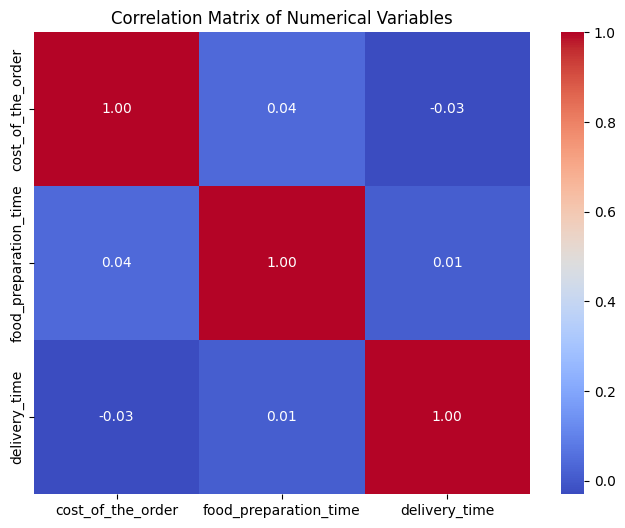

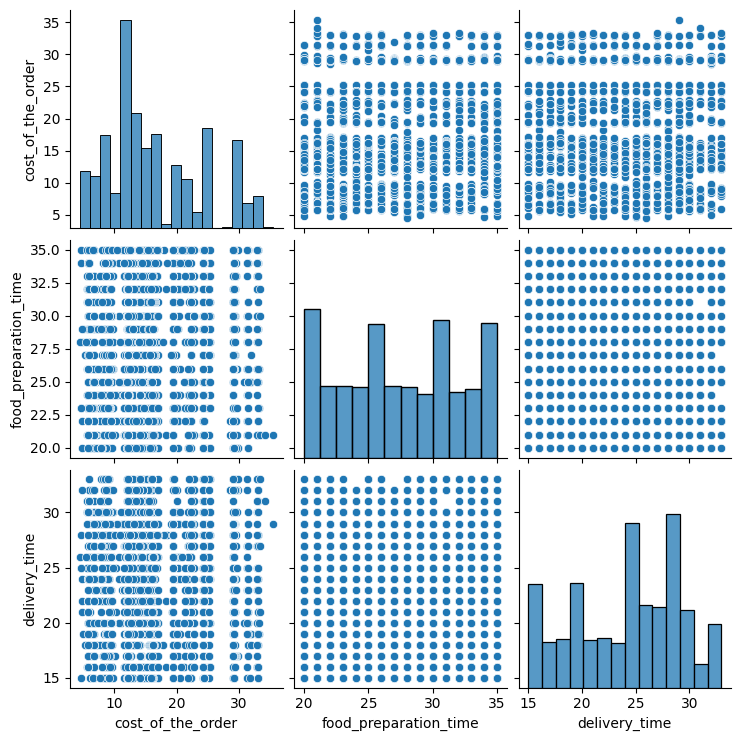

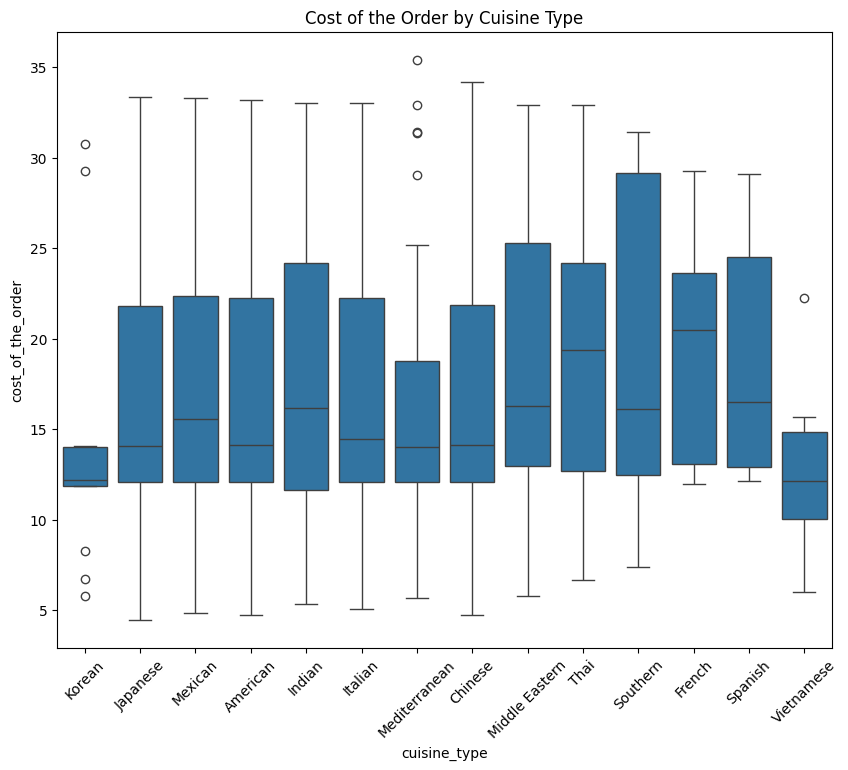

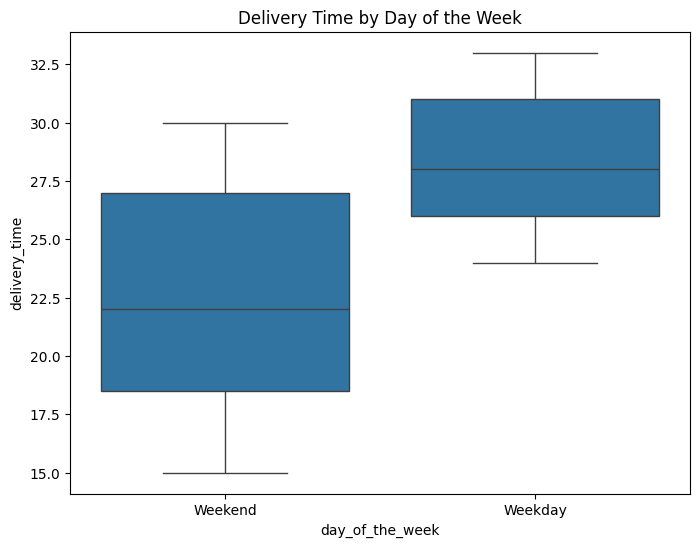

In [ ]:
# Write the code here
# Calculate the correlation matrix for numerical variables
corr_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Plot pair plot to visualize relationships between 'cost_of_the_order', 'food_preparation_time', and 'delivery_time'
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.show()

# Box plot to explore relationship between 'cost_of_the_order' and 'cuisine_type'
plt.figure(figsize=(10, 8))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('Cost of the Order by Cuisine Type')
plt.xticks(rotation=45)  # Rotate x labels for better readability if needed
plt.show()

# Box plot to explore relationship between 'delivery_time' and 'day_of_the_week'
plt.figure(figsize=(8, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time by Day of the Week')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here
# Replacing the 0 values I placed in earlier with NA values for calculation purposes
df['rating'] = pd.to_numeric(df['rating'].replace(0, pd.NA))

# Group by 'restaurant_name' and filter out those with rating counts more than 50 and average rating greater than 4
eligible_restaurants = df.groupby('restaurant_name').agg(rating_count=pd.NamedAgg(column='rating', aggfunc='count'), average_rating=pd.NamedAgg(column='rating', aggfunc='mean')).query('rating_count > 50 and average_rating > 4')
eligible_restaurants

,rating_count,average_rating
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


**The restaurants fulfilling the criteria and should get the promotional offer are:**
1. Blue Ribbon Fried Chicken
2. Blue Ribbon Sushi
3. Shake Shack
4. The Meatball Shop

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here
# Define a function to calculate the revenue per order
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply the function to the cost_of_the_order column to get a new revenue column and get the total revenue
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)
total_revenue = df['revenue'].sum()

print("The net revenue generated by the company across all orders:", "$" + str(round(total_revenue,2)))

The net revenue generated by the company across all orders: $6166.3


**The net revenue generated by the company across all orders: $6,166.3**

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Write the code here
# Calculate the total time (preparation + delivery) for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Find the percentage of orders that take more than 60 minutes
orders_over_60 = df[df['total_time'] > 60].shape[0]
percentage_over_60 = (orders_over_60 / df.shape[0]) * 100

print("The percentage of orders that take more than 60 minutes to be delivered:", str(round(percentage_over_60,2)) + "%")

The percentage of orders that take more than 60 minutes to be delivered: 10.54%


**The percentage of orders that take more than 60 minutes to be delivered: 10.54%**

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
mean_delivery_times = df.groupby('day_of_the_week')['delivery_time'].mean()
std_delivery_times = df.groupby('day_of_the_week')['delivery_time'].std()
print(mean_delivery_times)

print(std_delivery_times)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64
day_of_the_week
Weekday    2.891428
Weekend    4.628938
Name: delivery_time, dtype: float64


**Based on the information above, the Weekday delivery time is 5.87 more minutes on average compared to Weekends which is a standard deviation higher than usual.**


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  Certain cuisine types are more popular on weekends, which could indicate a trend in customer preference during leisure days.
*  A significant percentage of orders cost more than $20, suggesting customers are willing to spend on quality or quantity.
* The mean order delivery time might vary significantly between weekdays and weekends, reflecting operational efficiencies or challenges.
* Only a few restaurants have a high frequency of ratings and a high average rating, implying a strong correlation between customer satisfaction and repeat business.

### Recommendations:

*  For Cuisine Types: If certain cuisines are more popular on weekends, consider promoting them more heavily during the week to balance demand or offering weekend specials to capitalize on the popularity.
* Pricing Strategy: Given the spending patterns, consider introducing premium menu items or bundled offers to increase the average order value.
* Delivery Time Optimization: Analyze factors contributing to delivery time differences between weekdays and weekends. On busier days, consider increasing delivery resources or optimizing routes.
* Customer Loyalty: Reward restaurants with high ratings and frequent orders with more visibility on the platform to incentivize quality. Encourage restaurants with fewer or lower ratings to improve their offerings or service.

In [106]:
# Converting ipynb to htmo

%%shell
jupyter nbconvert --to html /content/drive/MyDrive/MITDataScience/Food\ Hub\ Project/FDS_Project_LearnerNotebook_FullCode.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/MITDataScience/Food Hub Project/FDS_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 1276325 bytes to /content/drive/MyDrive/MITDataScience/Food Hub Project/FDS_Project_LearnerNotebook_FullCode.html


---